# 3. State-space model with `NaN` data
In this example, we consider a state-space model with input and input vector $\bf{u}$, latent state $\bf{x}$, the coefficient $k$, and observed values $\bf{y}$ so that
$$
x_t = x_{t-1} + k u_t^2 + q_t
$$
$$
y_t = x_t + r_t,
$$
where the noise variables are Gaussian $q_t \sim \mathcal{N}(0,1), \quad r_t \sim \mathcal{N}(0,1)$. The problem we address is to estimate $k$ and $\bf x$ with the knowledge of $\bf u$ and $\bf y$.

We generate the data with $k \sim \mathcal{N}(1,1)$ and $u_{t} \sim \mathcal{N}(0,1)$ (thus, $u_t^2 \sim \chi^2(1)$, not important for the remainder of this example), **but** we mask half of the generated $\bf y$ values with `NaN`:

In [1]:
import numpy as np
import pandas as pd
from numpy.random import default_rng

N = 40

true_k = default_rng(0).normal(1, 1)
time = pd.date_range("2018-01-01 00:00:00", tz='utc', periods=N, freq="H")
u = default_rng(1).normal(0, 1, size=N)
q = default_rng(2).normal(0, 1, size=N)
x = (true_k * u ** 2 + q).cumsum()
r = default_rng(3).normal(0, 1, size=N)

df = pd.DataFrame({'u': u, 'x': x, 'q': q, 'y': x + r, 'time': time})

hidden = default_rng(4).choice([True, False], size=len(df), p=[.5, .5])

df.loc[hidden, 'y'] = float('nan')

In [2]:
df

,u,x,q,y,time
0,0.345584,0.323498,0.189053,2.364417,2018-01-01 00:00:00+00:00
1,0.821618,0.560680,-0.522748,-1.994985,2018-01-01 01:00:00+00:00
2,0.330437,0.270534,-0.413064,0.688633,2018-01-01 02:00:00+00:00
3,-1.303157,-0.259197,-2.441467,NaN,2018-01-01 03:00:00+00:00
4,0.905356,2.463237,1.799707,2.010587,2018-01-01 04:00:00+00:00
5,0.446375,3.831704,1.144166,NaN,2018-01-01 05:00:00+00:00
6,-0.536953,3.830851,-0.325423,1.810865,2018-01-01 06:00:00+00:00
7,0.581118,4.984815,0.773807,NaN,2018-01-01 07:00:00+00:00
8,0.364572,5.415649,0.281211,4.550436,2018-01-01 08:00:00+00:00
9,0.294132,4.959218,-0.553823,8.282217,2018-01-01 09:00:00+00:00


The true value of $k$, which we will try to estimate is

In [3]:
true_k

1.1257302210933933

Hence, there are periods of varying duration with no observations, occuring irregularly. However, we have access to the input $u$ at any time, whose values have a substantial impact on the state $x$.

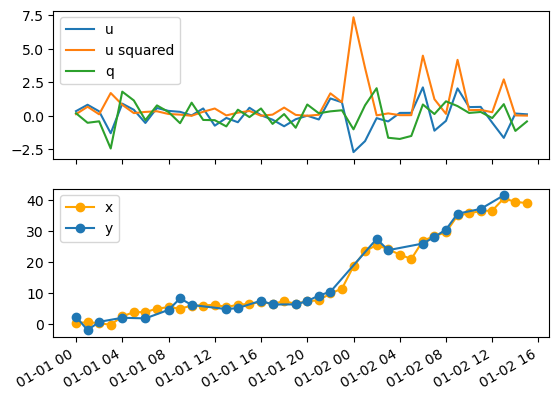

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(df['time'], df['u'], label='u')
ax[0].plot(df['time'], df['u'] ** 2, label='u squared')
ax[0].plot(df['time'], df['q'], label='q')
ax[0].legend()

ax[1].plot(df['time'], df['x'], '-o', c='orange', label='x')
ax[1].plot(df.loc[~df['y'].isna(), 'time'], df.loc[~df['y'].isna(), 'y'], 'o-', label='y')
ax[1].legend()

plt.gcf().autofmt_xdate()

plt.show()

To create the model with Sakkara, we start with the priors for $k$ and $\bf q$. We also generate the data components `dc`.

In [5]:
import pymc as pm
from sakkara.model import data_components, DistributionComponent as DC

k = DC(pm.Normal, name='k', mu=1)

q = DC(pm.Normal, name='q', group='time')

dc = data_components(df)

To square the input data of $u$, we could have created a new column in the data frame of squared values, but we can also use the `square` function from [PyTensor](https://pytensor.readthedocs.io/en/latest/index.html) together with `FunctionComponent` in Sakkara:

In [6]:
import pytensor.tensor as pt
from sakkara.model import FunctionComponent as FC

u_squared = FC(pt.square, dc['u'])

`FunctionComponent` can be used to wrap any function to be performed on PyMC variables, with the function as the first argument, followed by Sakkara components as arguments or keyword arguments, which will be passed to the function once the PyMC variables are created in Sakkara.

However, `FunctionComponent` does not register any PyMC variable with a name that can be found among posterior variables. To enable this, we can wrap it with `DeterministicComponent`, which wraps PyMC's [Deterministic](https://www.pymc.io/projects/docs/en/stable/api/generated/pymc.Deterministic.html). This is the case for $\bf x$, whose posterior distribution we want to access later on: 

In [7]:
from sakkara.model import DeterministicComponent

x = DeterministicComponent('x', FC(pt.cumsum, k * u_squared + q), group='time')

Next up, we have the likelihood, which is created in a manner similar to the previous notebook examples:

In [8]:
from sakkara.model import Likelihood

likelihood = Likelihood(pm.Normal,
                        mu=x,
                        sigma=1,
                        observed=dc['y'],
                        nan_data_mask=0,
                        nan_param_mask={'mu': 0, 'sigma': 1}
                        )

C:\Users\hhakansson\miniconda3\envs\sakkara-examples\lib\site-packages\sakkara\model\composable\hierarchical\likelihood.py:38: UserWarning: Observables contains NaN values, these will be ignored in likelihood computation.
  warnings.warn('Observables contains NaN values, these will be ignored in likelihood computation.',


When having `Nan` among the observed values in PyMC, those rows will be omitted from the construction of variables. That is however not possible in this case, since we need all $\bf u$ for each time step. When having `NaN` values among the observed values in Sakkara, we need to specify `nan_data_mask` and `nan_param_mask`. Under the hood, Sakkara will assign `mu=x` for the non-NaN observables and `mu=nan_param_mask['mu']` for the NaN observables. Similarly, `NaN` will be replaced by the value specified in `nan_data_mask`. Note that the choice of `nan_data_mask` and `nan_param_mask` do not change the inference, but it may affect the value of ELBO when doing variational inference.

All that is left for us is building the model, and deploy the inference button:

In [9]:
from sakkara.model import build

model = build(df, likelihood)

In [10]:
idata = pm.sample(model=model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [k, q]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 269 seconds.


In this case, the posterior of $k$ is in a reasonable range, although slightly over-estimated:

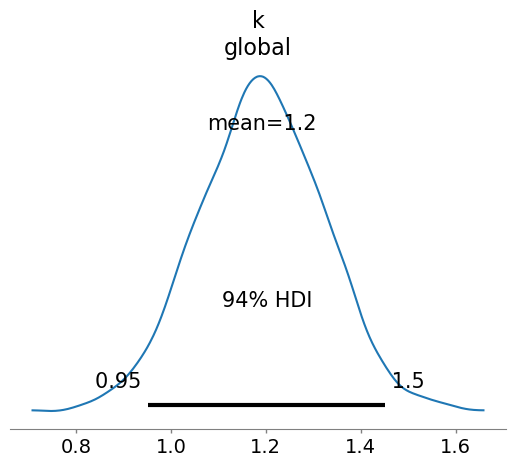

In [11]:
import arviz as az
az.plot_posterior(idata, var_names='k')
plt.show()

Since we used `DeterministicComponent` for `x`, we can access its posterior directly:

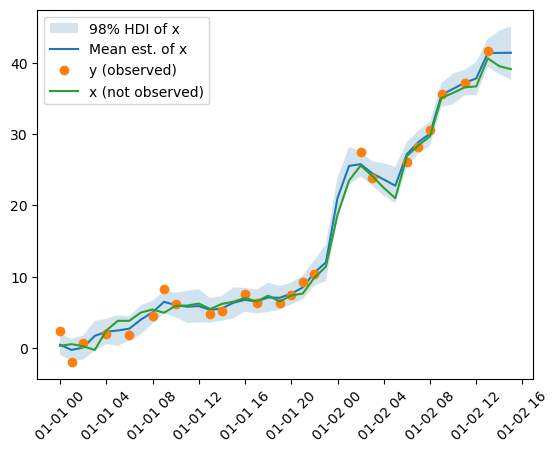

In [12]:
posterior = idata.posterior['x'].to_dataframe()['x']

plt.fill_between(df['time'], posterior.groupby('time').quantile(.01).values, posterior.groupby('time').quantile(.99).values, alpha=.2, label='98% HDI of x')
plt.plot(df['time'], posterior.groupby('time').mean().values, label='Mean est. of x')

plt.plot(df.loc[~df['y'].isna(), 'time'], df.loc[~df['y'].isna(), 'y'], 'o', label='y (observed)')
plt.plot(df['time'], df['x'], label='x (not observed)')

plt.legend()
plt.xticks(rotation=45)
plt.show()

Similarly, we can also the posterior of $\bf q$:

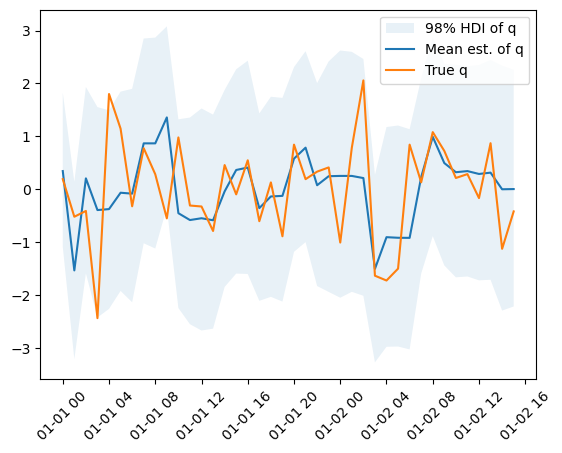

In [13]:
posterior = idata.posterior['q'].to_dataframe()['q']

plt.fill_between(df['time'], posterior.groupby('time').quantile(.01).values, posterior.groupby('time').quantile(.99).values, alpha=.1, label='98% HDI of q')
plt.plot(df['time'], posterior.groupby('time').mean().values, label='Mean est. of q')

plt.plot(df['time'], df['q'], label='True q')

plt.legend()
plt.xticks(rotation=45)
plt.show()